In [66]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [67]:
# data load
data=pd.read_csv("../dataset/mnist/mnist_train.csv")

In [68]:
data.head(3)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
data=np.array(data)
#data=np.asfarray(data) # converting the datatype from int to float
m,n=data.shape
np.random.shuffle(data) 

In [70]:
print(m,n)

60000 785


So, the train dataset contains 60000 examples. where each row represents a training example. Now we will split the dataset into train , validation and test set. Moreover, for convenience we will transpose the datset so that each column represents a trainign example


In [71]:
#validation set
data_val=data[:1000].T
X_val=data_val[1:n] #discarding 0 column which contains labels
X_val=np.asfarray(X_val)
X_val/=255.0 # normalize data to train faster
Y_val=data_val[0]

#training set
data_train=data[1000:m].T
X_train=data_train[1:n]
X_train=np.asfarray(X_train)
Y_train=data_train[0]
X_train/=255



In [72]:
print(X_train.shape)
print(Y_train.shape)
print(X_train[:,:2]) #frist 2 training example
print(Y_train[:2]) #first 2 labels

(784, 59000)
(59000,)
[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]
[8 3]


we have our different dataset. we can now perform out training part. But for this we need to initialize our weights and biases.

In [73]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

we use ReLU for activation in layers except output layer and softmax functions in the output layer.

In [74]:
def ReLU(Z):
    return np.maximum(Z, 0)

In [75]:
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

In [76]:
def ReLU_deriv(Z):
    return Z > 0

### Forward propagation
We are ready for forward pass

In [77]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = np.dot(W1,X)+ b1
    A1 = ReLU(Z1)
    Z2 = np.dot(W2,A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

In [78]:
print(Y_train[:10])

[8 3 6 0 7 3 9 8 1 1]


Notice here that the y contains the index of true labels for each examples. For conveniece we can use One-hot-encoding. In this process we will put 1 at the true label positions and 0 at other positons.

In [79]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))  #each column represents labels, row one example
    one_hot_Y[np.arange(Y.size), Y] = 1.0 #sets 1 at the actural label position
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [80]:
print(one_hot(Y_train))


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [81]:
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

In [82]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [83]:
def get_predictions(A2):
    return np.argmax(A2, 0)

In [84]:
def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

In [85]:
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [86]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[6 2 0 ... 1 6 6] [8 3 6 ... 1 3 5]
0.052
Iteration:  10
[2 2 0 ... 2 6 6] [8 3 6 ... 1 3 5]
0.11716949152542373
Iteration:  20
[2 2 0 ... 2 6 6] [8 3 6 ... 1 3 5]
0.14979661016949153
Iteration:  30
[2 2 3 ... 2 6 6] [8 3 6 ... 1 3 5]
0.18015254237288136
Iteration:  40
[2 2 6 ... 2 6 6] [8 3 6 ... 1 3 5]
0.20710169491525424
Iteration:  50
[2 2 6 ... 2 6 6] [8 3 6 ... 1 3 5]
0.23030508474576272
Iteration:  60
[2 2 6 ... 2 6 6] [8 3 6 ... 1 3 5]
0.25822033898305086
Iteration:  70
[2 2 6 ... 2 6 6] [8 3 6 ... 1 3 5]
0.30115254237288136
Iteration:  80
[2 3 6 ... 1 6 6] [8 3 6 ... 1 3 5]
0.37130508474576274
Iteration:  90
[2 3 6 ... 1 6 6] [8 3 6 ... 1 3 5]
0.4381694915254237
Iteration:  100
[2 3 6 ... 1 6 6] [8 3 6 ... 1 3 5]
0.48689830508474574
Iteration:  110
[2 3 6 ... 1 6 6] [8 3 6 ... 1 3 5]
0.5214067796610169
Iteration:  120
[2 3 6 ... 1 6 6] [8 3 6 ... 1 3 5]
0.5496949152542373
Iteration:  130
[2 3 6 ... 1 6 6] [8 3 6 ... 1 3 5]
0.5743898305084746
Iteration:  140
[2 3 

In [87]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

In [88]:
def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

let's look at couple of examples


Prediction:  [2]
Label:  8


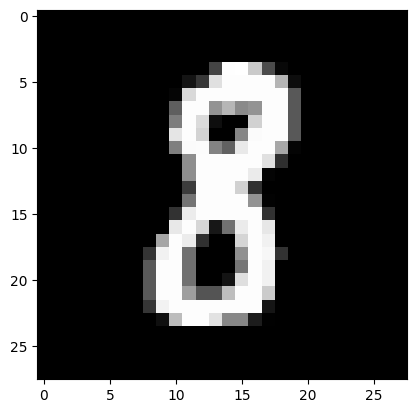

Prediction:  [3]
Label:  3


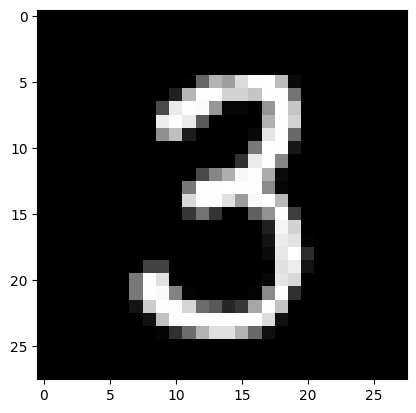

Prediction:  [6]
Label:  6


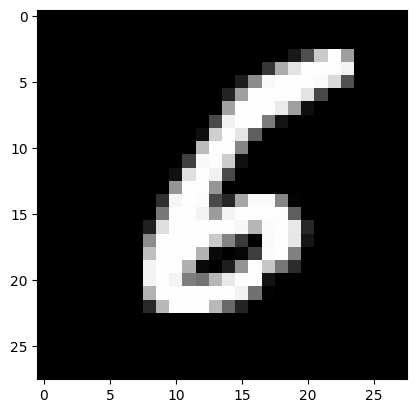

Prediction:  [0]
Label:  0


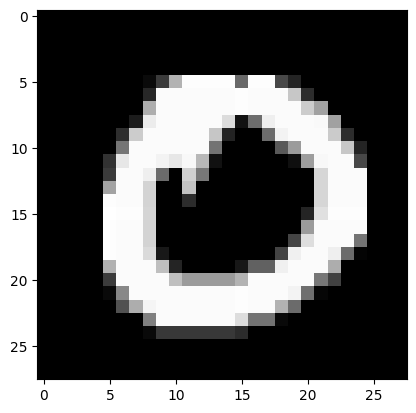

In [89]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

let's find the accuracy on validation set

In [90]:
dev_predictions = make_predictions(X_val, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_val)

[7 2 2 0 3 9 3 0 1 2 0 4 3 8 0 8 4 1 4 9 5 6 7 9 3 1 3 7 2 7 1 3 8 7 3 2 7
 0 6 5 0 8 4 3 8 9 6 0 4 2 8 3 9 9 1 7 0 4 2 6 3 0 1 9 7 7 2 8 9 1 4 8 2 8
 3 1 9 7 9 1 9 6 5 1 2 6 6 4 8 1 0 8 9 8 3 8 0 5 4 5 9 6 2 7 6 2 3 6 6 8 1
 4 3 9 6 5 3 8 2 6 1 2 5 5 6 5 1 4 3 2 1 8 1 5 9 2 1 2 5 3 1 8 1 9 5 1 4 7
 3 7 9 9 6 0 7 7 3 4 5 1 8 2 9 2 1 2 4 4 4 5 1 0 0 3 4 1 6 6 4 5 4 7 9 1 6
 0 1 1 7 1 3 1 6 9 0 3 6 6 3 9 2 8 2 8 5 8 0 3 7 5 7 5 2 2 1 2 3 8 8 9 6 1
 0 4 1 3 6 7 7 6 0 9 2 5 1 3 6 9 9 9 1 7 7 3 4 0 2 4 2 3 6 8 8 5 8 2 4 0 0
 8 9 0 2 7 0 7 9 0 3 0 7 2 9 1 2 0 1 5 5 0 8 7 3 8 1 9 3 1 1 3 3 7 0 1 8 8
 7 0 8 9 7 4 8 5 5 3 1 8 1 1 1 7 8 8 5 1 0 3 2 4 1 9 8 9 2 3 2 1 8 1 3 3 2
 4 6 0 0 3 2 6 4 1 4 3 1 9 7 5 2 7 8 8 1 9 3 7 7 2 8 6 2 0 2 8 0 1 5 9 3 5
 4 1 6 3 8 5 8 1 2 9 3 4 9 2 2 3 0 7 9 7 5 6 9 4 9 9 0 9 7 0 8 7 0 0 6 0 8
 1 3 5 0 6 4 7 2 6 0 1 8 0 5 7 9 4 9 1 2 3 3 5 1 0 6 8 8 3 3 7 2 7 8 4 9 7
 1 3 5 3 9 7 4 3 1 1 8 8 2 6 3 2 6 0 7 3 5 4 6 8 5 6 4 1 7 0 6 3 8 7 4 4 7
 0 8 2 0 5 6 8 8 4 3 9 8 

0.804